# Global Superstore Sales & Profitability Analysis

**Objective:** To analyze the Global Superstore dataset to identify key drivers of sales and profit, uncover trends, and provide actionable recommendations to improve business performance.

### 1. Setup - Importing Libraries

First, we'll import the necessary Python libraries for data manipulation (pandas, numpy) and data visualization (matplotlib, seaborn).

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

# Setting plot style for better aesthetics
sns.set_style('whitegrid')

### 2. Data Loading and Initial Exploration

Here, we load the dataset from the CSV file into a pandas DataFrame and perform an initial check to understand its structure, data types, and basic statistics.

In [5]:
# Load the dataset
df = pd.read_csv("Global_Superstore.csv")

**Displaying the first 5 rows to get a feel for the data.**

In [7]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,11/11/2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/2014,2/7/2014,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/2014,10/18/2014,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/2014,1/30/2014,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/2014,11/6/2014,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


**Getting a summary of the DataFrame.** 

This includes the number of entries, column names, non-null counts, and data types. This is useful for identifying missing values and incorrect data types.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          1000 non-null   int64  
 1   Order ID        1000 non-null   object 
 2   Order Date      1000 non-null   object 
 3   Ship Date       1000 non-null   object 
 4   Ship Mode       1000 non-null   object 
 5   Customer ID     1000 non-null   object 
 6   Customer Name   1000 non-null   object 
 7   Segment         1000 non-null   object 
 8   Postal Code     194 non-null    float64
 9   City            1000 non-null   object 
 10  State           1000 non-null   object 
 11  Country         1000 non-null   object 
 12  Region          1000 non-null   object 
 13  Market          1000 non-null   object 
 14  Product ID      1000 non-null   object 
 15  Category        1000 non-null   object 
 16  Sub-Category    1000 non-null   object 
 17  Product Name    1000 non-null   ob

**Generating descriptive statistics for the numerical columns.**

In [11]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,1000.000000,194.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,25079.328000,53966.170103,1710.971470,5.55800,0.092840,288.920440,272.384897
std,12897.726632,33734.306466,1259.239238,2.71846,0.148666,574.504782,176.160716
min,58.000000,2920.000000,1.910000,1.00000,0.000000,-3059.820000,1.070000
25%,15118.750000,19134.000000,826.907500,4.00000,0.000000,10.037500,209.827500
50%,25084.500000,60564.000000,1585.115000,5.00000,0.000000,190.685000,258.897500
75%,34524.000000,88187.500000,2477.812500,7.00000,0.150000,518.872500,351.070250
max,51284.000000,98198.000000,9892.740000,14.00000,0.800000,4946.370000,923.630000


### 3. Data Cleaning

In this section, we'll clean the data by handling missing values, dropping irrelevant columns, converting data types, and checking for duplicates.

**Checking for missing (null) values in each column.**

In [14]:
df.isna().sum()

Row ID              0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Postal Code       806
City                0
State               0
Country             0
Region              0
Market              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Discount            0
Profit              0
Shipping Cost       0
Order Priority      0
dtype: int64

**Handling Missing Values and Irrelevant Columns**

The 'Postal Code' column has a significant number of missing values (over 80%). Since we have detailed location data (City, State, Country), this column is redundant and can be dropped. 'Row ID' is just an index and not useful for analysis, so it will be dropped as well.

In [16]:
df.drop(columns=['Postal Code', 'Row ID'], axis=1, inplace=True)

**Converting Data Types**

The date columns are currently stored as objects (strings). We need to convert them to datetime objects to perform time series analysis.

In [18]:
# Convert 'Order Date' and 'Ship Date' to datetime objects
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

**Checking for Duplicate Rows**

We'll check if there are any complete duplicate rows in the dataset.

In [20]:
df.duplicated().sum()

0

### 4. Exploratory Data Analysis (EDA)

Now that the data is clean, we can start exploring it to answer key business questions through calculations and visualizations.

**Overall Performance: Total Sales and Profit**

In [23]:
sales = df['Sales'].sum()
profit = df['Profit'].sum()
print(f'Global Mart total sales is ${sales:,.2f} and total profit is ${profit:,.2f}.')

Global Mart total sales is $1,710,971.47 and total profit is $288,920.44.


**Product Performance: Top Selling vs. Top Profitable Products**

In [25]:
# Top selling products by Sales
top_selling_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)
print("--- Top 5 Selling Products by Sales ---")
print(top_selling_products.head())

# Top profitable products
profit_by_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False)
print("\n--- Top 5 Profitable Products by Profit ---")
print(profit_by_products.head())

--- Top 5 Selling Products by Sales ---
Product Name
Motorola Smart Phone, Full Size    48542.52
Apple Smart Phone, Full Size       42303.44
Cisco Smart Phone, Full Size       41325.20
Nokia Smart Phone, Full Size       27661.97
Samsung Smart Phone, Cordless      25438.59
Name: Sales, dtype: float64

--- Top 5 Profitable Products by Profit ---
Product Name
Motorola Smart Phone, Full Size      13088.28
Hoover Stove, Red                    10288.61
Cisco Smart Phone, Full Size          9662.99
Cisco Smart Phone, with Caller ID     6607.40
Nokia Smart Phone, Full Size          5765.12
Name: Profit, dtype: float64


**Regional Performance: Sales vs. Profit by Region**

In [27]:
# Sales by region
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
print("--- Top 5 Regions by Sales ---")
print(region_sales.head())

# Profit by Region
profit_by_region = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)
print("\n--- Top 5 Regions by Profit ---")
print(profit_by_region.head())

--- Top 5 Regions by Sales ---
Region
Western Europe       259576.28
Oceania              220809.08
Southern Asia        205466.26
Eastern Asia         193590.60
Southeastern Asia    147337.60
Name: Sales, dtype: float64

--- Top 5 Regions by Profit ---
Region
Eastern Asia       37911.16
Southern Asia      37536.60
Oceania            33777.56
Western Europe     32783.40
Northern Europe    23552.73
Name: Profit, dtype: float64


**Time Series Analysis: Monthly Sales Trends**

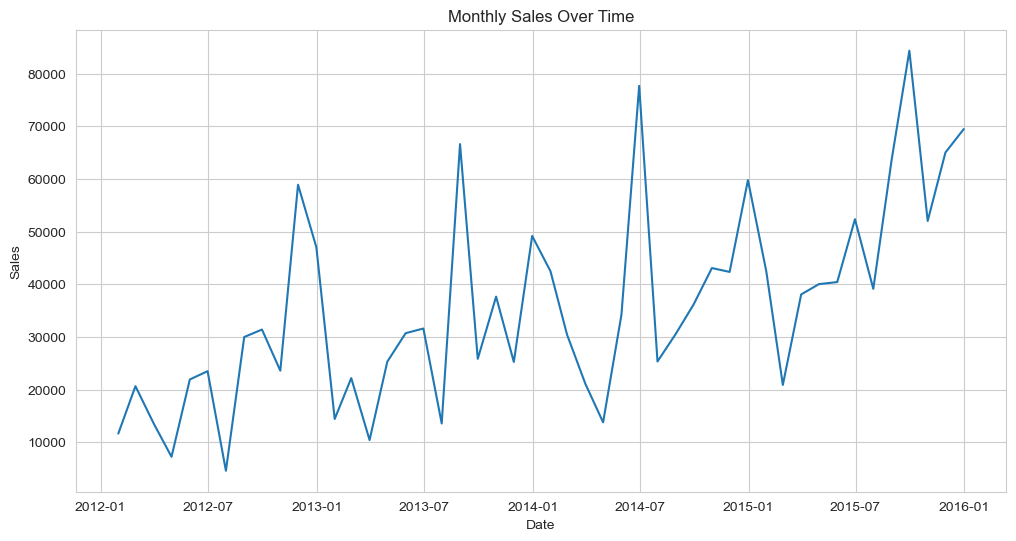

In [29]:
# Set Order Date as index for time series analysis
df_time = df.set_index('Order Date')

# Resample to get monthly sales
monthly_sales = df_time['Sales'].resample('M').sum()

# Lineplot of Monthly sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

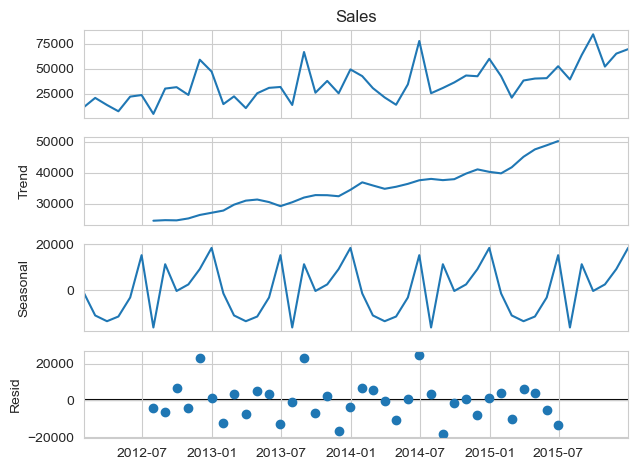

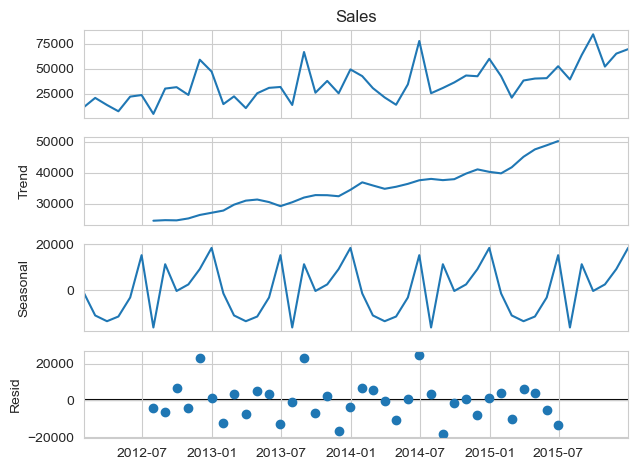

In [30]:
result = seasonal_decompose(monthly_sales, model = 'addictive', period = 12)
result.plot()

### 5. Deep Dive: Investigating Key Relationships

This section focuses on testing specific hypotheses about what drives profitability and performance.

**Profitability Analysis: Which category has the best margin?**

To understand true profitability, we calculate the profit margin (Profit / Sales) for each category. This shows which categories are most efficient at converting revenue into profit.

--- Category Financials ---
          Category  total_sales  total_profit  avg_discount  \
0        Furniture    601492.31      82188.95      0.105031   
1  Office Supplies    352496.14      61662.81      0.115520   
2       Technology    756983.02     145068.68      0.066759   

   total_shipping_cost  profit_margin  shipping_cost_pct  
0            98384.648      13.664173          16.356759  
1            52716.553      17.493187          14.955214  
2           121283.696      19.164060          16.021984  


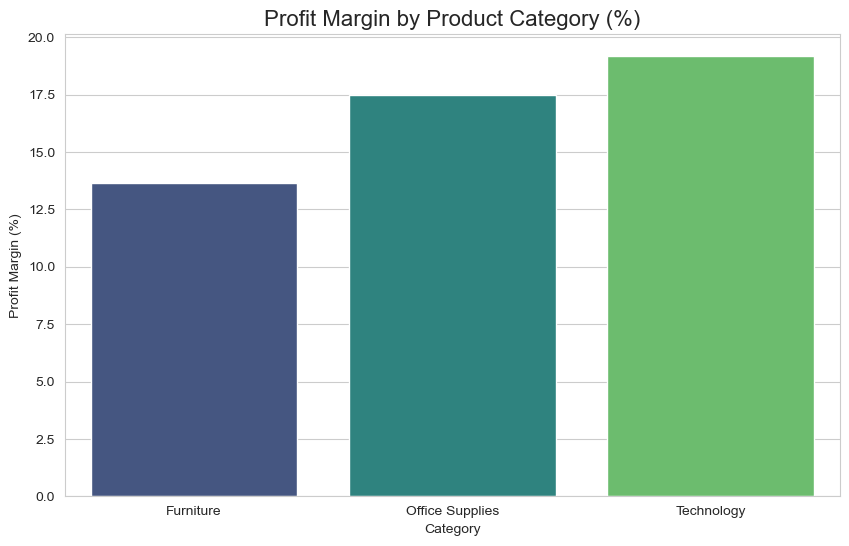

In [33]:
# Calculate key financial metrics for each category
category_financials = df.groupby('Category').agg(
    total_sales=('Sales', 'sum'),
    total_profit=('Profit', 'sum'),
    avg_discount=('Discount', 'mean'),
    total_shipping_cost=('Shipping Cost', 'sum')
).reset_index()

# Calculate Profit Margin and Shipping Cost as a % of Sales
category_financials['profit_margin'] = (category_financials['total_profit'] / category_financials['total_sales']) * 100
category_financials['shipping_cost_pct'] = (category_financials['total_shipping_cost'] / category_financials['total_sales']) * 100

print("--- Category Financials ---")
print(category_financials)

# --- Visualization: Profit Margin by Category ---
plt.figure(figsize=(10, 6))
sns.barplot(data=category_financials, x='Category', y='profit_margin', palette='viridis')
plt.title('Profit Margin by Product Category (%)', fontsize=16)
plt.ylabel('Profit Margin (%)')
plt.xlabel('Category')
plt.show()

**The Impact of Discounts: Is there a link between discount and profit?**

We'll investigate the relationship between discounts and profit, both statistically with a correlation coefficient and visually with a scatter plot. We also group by region to see if some regions are discounting more heavily.

Correlation between Discount and Profit is: -0.51

--- Regional Profit and Average Discount ---
                 total_profit  avg_discount
Region                                     
Eastern Asia         37911.16      0.038889
Southern Asia        37536.60      0.031034
Oceania              33777.56      0.117000
Western Europe       32783.40      0.119847
Northern Europe      23552.73      0.060417


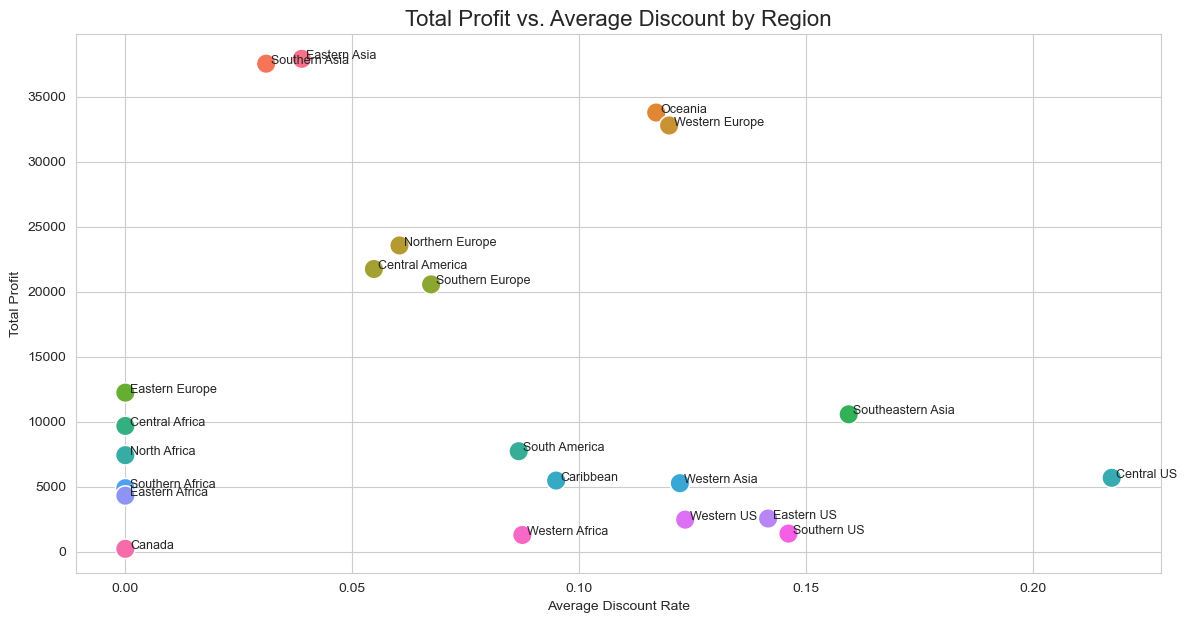

In [35]:
# Calculate the correlation between Discount and Profit
correlation_discount_profit = df['Discount'].corr(df['Profit'])
print(f"Correlation between Discount and Profit is: {correlation_discount_profit:.2f}")

# Aggregate data by region to see discount and profit patterns
regional_profit_discount = df.groupby('Region').agg(
    total_profit=('Profit', 'sum'),
    avg_discount=('Discount', 'mean')
).sort_values(by='total_profit', ascending=False)

print("\n--- Regional Profit and Average Discount ---")
print(regional_profit_discount.head())

# --- Visualization: Profit vs. Discount by Region ---
plt.figure(figsize=(14, 7))
sns.scatterplot(data=regional_profit_discount.reset_index(), x='avg_discount', y='total_profit', s=200, hue='Region', legend=False)
plt.title('Total Profit vs. Average Discount by Region', fontsize=16)
plt.xlabel('Average Discount Rate')
plt.ylabel('Total Profit')

# Annotate points with region names for clarity
for i, row in regional_profit_discount.iterrows():
    plt.text(row.avg_discount + 0.001, row.total_profit, i, fontsize=9)

plt.grid(True)
plt.show()

--- Profitability by Discount Range ---
  discount_range  profit_margin
0          0-20%      22.235398
1         21-40%      -0.062406
2         41-60%     -47.899624
3         61-80%     -95.256351
4        81-100%    -159.876879


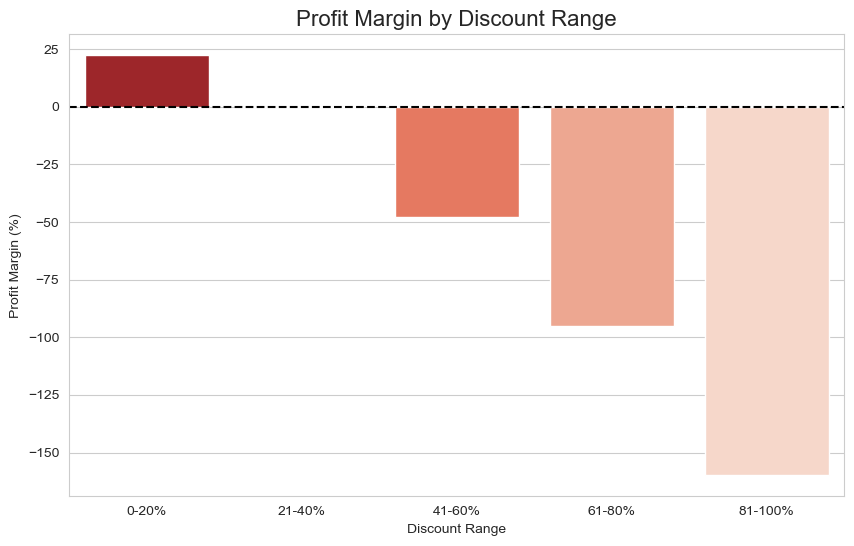

In [73]:
# Create bins for discount ranges
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0] # 0-20%, 21-40%, etc.
labels = ['0-20%', '21-40%', '41-60%', '61-80%', '81-100%']
df['discount_range'] = pd.cut(df['Discount'], bins=bins, labels=labels, right=False, include_lowest=True)

# Group by the new discount ranges and calculate financials
discount_analysis = df.groupby('discount_range').agg(
    total_sales=('Sales', 'sum'),
    total_profit=('Profit', 'sum')
).reset_index()

# Calculate profit margin for each discount range
discount_analysis['profit_margin'] = (discount_analysis['total_profit'] / discount_analysis['total_sales']) * 100

print("--- Profitability by Discount Range ---")
print(discount_analysis[['discount_range', 'profit_margin']])

# --- Visualization: Discount Range vs. Profit Margin  ---
plt.figure(figsize=(10, 6))
sns.barplot(
    data=discount_analysis,
    x='discount_range',
    y='profit_margin',
    palette='Reds_r',
    hue='discount_range', # Assign the x-axis variable to hue
    legend=False          # Disable the legend as it's redundant
)
plt.title('Profit Margin by Discount Range', fontsize=16)
plt.xlabel('Discount Range')
plt.ylabel('Profit Margin (%)')
plt.axhline(0, color='black', linewidth=1.5, linestyle='--')
plt.show()

**Regional Product Mix: Are top regions selling different types of products?**

A stacked bar chart helps us see the proportion of items sold from each category across different regions. This can help explain why some regions are more profitable than others.

--- Quantity of Items Sold by Category and Region ---
Category         Furniture  Office Supplies  Technology
Region                                                 
Canada                 0.0             25.0         0.0
Caribbean             41.0             31.0        40.0
Central Africa        30.0             16.0        34.0
Central America      168.0             85.0       207.0
Central US            21.0            131.0        29.0


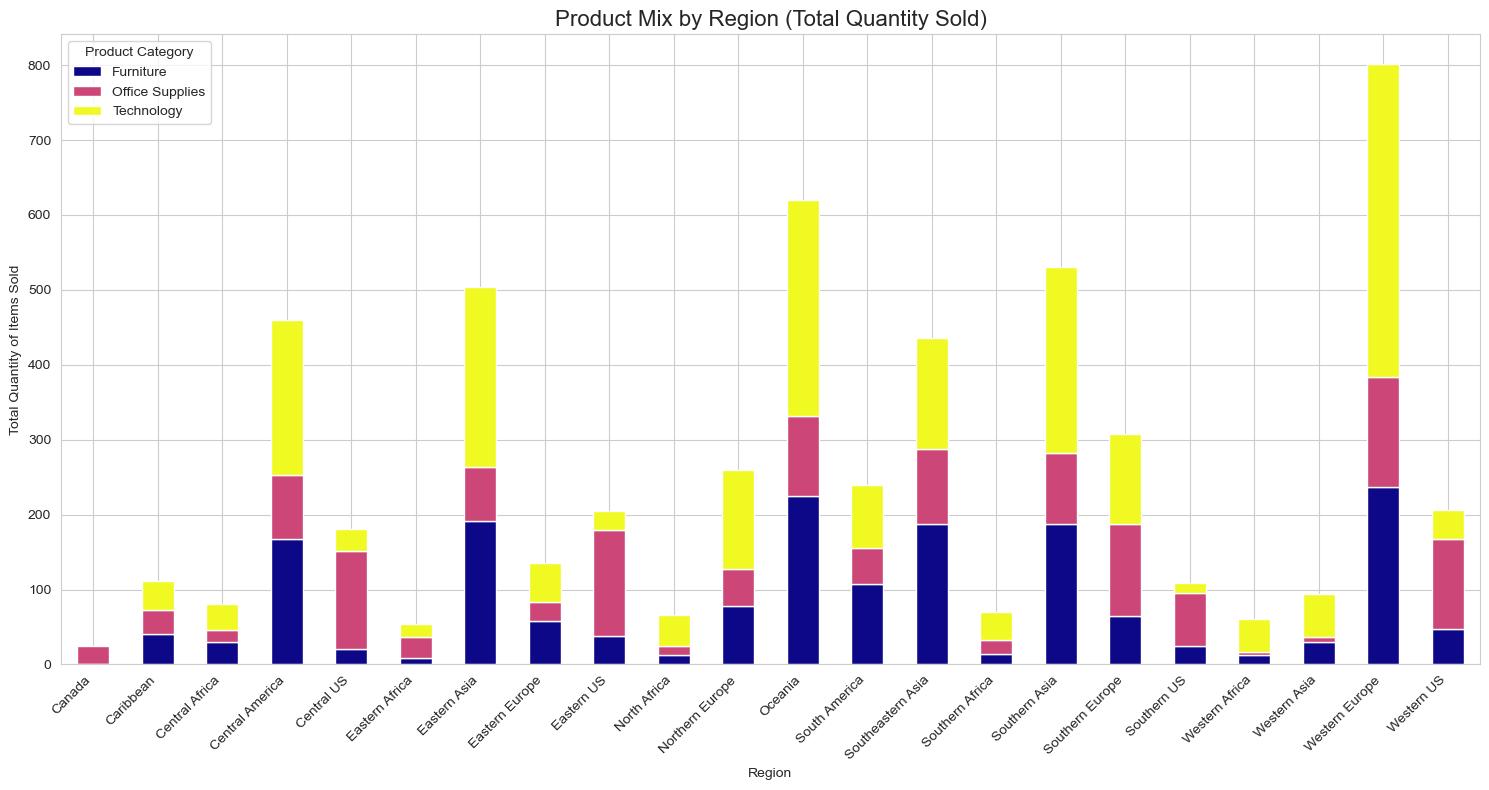

In [38]:
# Group by Region and Category to see the number of items sold
regional_product_mix = df.groupby(['Region', 'Category'])['Quantity'].sum().unstack().fillna(0)

print("--- Quantity of Items Sold by Category and Region ---")
print(regional_product_mix.head())

# --- Visualization: Stacked bar chart for product mix ---
regional_product_mix.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='plasma')
plt.title('Product Mix by Region (Total Quantity Sold)', fontsize=16)
plt.ylabel('Total Quantity of Items Sold')
plt.xlabel('Region')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()

#### Profitability within the Office Supplies Category

--- Profit Margin for Office Supplies Sub-Categories ---
           Category Sub-Category  total_sales  total_profit  profit_margin
8   Office Supplies    Fasteners       513.44        246.47      48.003662
10  Office Supplies        Paper      1816.57        806.32      44.386949
9   Office Supplies       Labels        54.79         21.86      39.897792
6   Office Supplies      Binders     19751.19       7435.09      37.643757
7   Office Supplies    Envelopes       114.06         42.02      36.840260
5   Office Supplies          Art       904.55        191.87      21.211652
4   Office Supplies   Appliances    289711.30      48518.99      16.747358
11  Office Supplies      Storage     37592.32       4490.04      11.944035
12  Office Supplies     Supplies      2037.92        -89.85      -4.408907


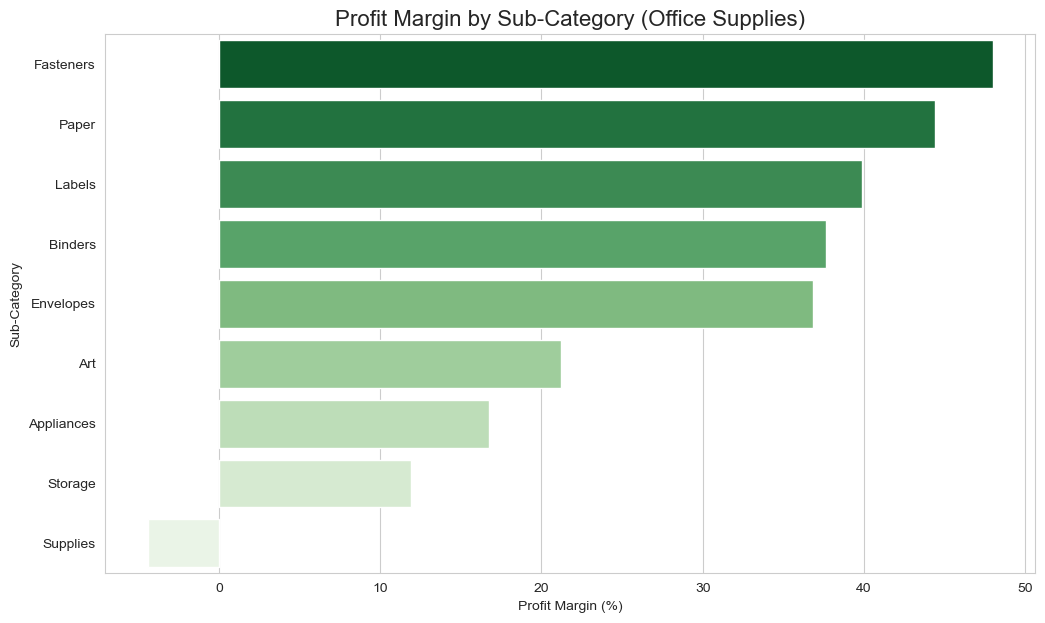

In [40]:
# Group by Category and Sub-Category to get a granular view
sub_category_financials = df.groupby(['Category', 'Sub-Category']).agg(
    total_sales=('Sales', 'sum'),
    total_profit=('Profit', 'sum'),
).reset_index()

# Calculate profit margin for each sub-category
sub_category_financials['profit_margin'] = (sub_category_financials['total_profit'] / sub_category_financials['total_sales']) * 100

# Filter just for Office Supplies and sort by profit margin
office_supplies_margins = sub_category_financials[sub_category_financials['Category'] == 'Office Supplies'].sort_values(by='profit_margin', ascending=False)

print("--- Profit Margin for Office Supplies Sub-Categories ---")
print(office_supplies_margins)

# --- Visualization: Sub-Category Profit Margins in Office Supplies ---
plt.figure(figsize=(12, 7))
sns.barplot(data=office_supplies_margins, x='profit_margin', y='Sub-Category', palette='Greens_r')
plt.title('Profit Margin by Sub-Category (Office Supplies)', fontsize=16)
plt.xlabel('Profit Margin (%)')
plt.ylabel('Sub-Category')
plt.show()

**Seasonal Trends: What drives the end-of-year sales peak?**

We noticed a sales spike in Q4. Let's see if this is driven by a specific customer segment (e.g., consumer holiday shopping vs. corporate end-of-year budgets).

--- Q4 Sales by Customer Segment ---
Segment
Consumer       299018.57
Corporate      161779.50
Home Office    112435.79
Name: Sales, dtype: float64


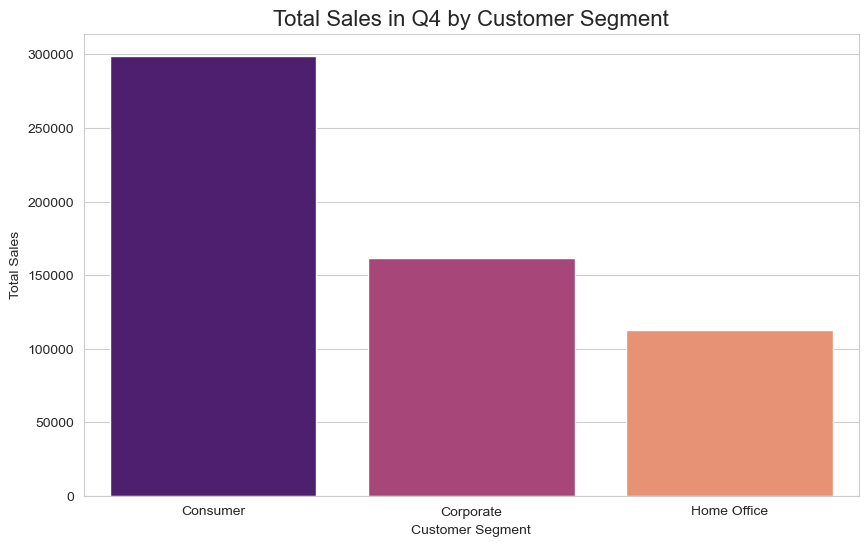

In [42]:
# Filter for Q4 data (months 10, 11, 12)
q4_df = df[df['Order Date'].dt.month.isin([10, 11, 12])]

# Group by segment and sum the sales for Q4
q4_sales_by_segment = q4_df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)

print("--- Q4 Sales by Customer Segment ---")
print(q4_sales_by_segment)

# --- Visualization: Q4 Sales by Segment ---
plt.figure(figsize=(10, 6))
sns.barplot(x=q4_sales_by_segment.index, y=q4_sales_by_segment.values, palette='magma')
plt.title('Total Sales in Q4 by Customer Segment', fontsize=16)
plt.ylabel('Total Sales')
plt.xlabel('Customer Segment')
plt.show()

--- Q4 Sales by Product Category ---
Category
Technology         275996.60
Furniture          184122.95
Office Supplies    113114.31
Name: Sales, dtype: float64


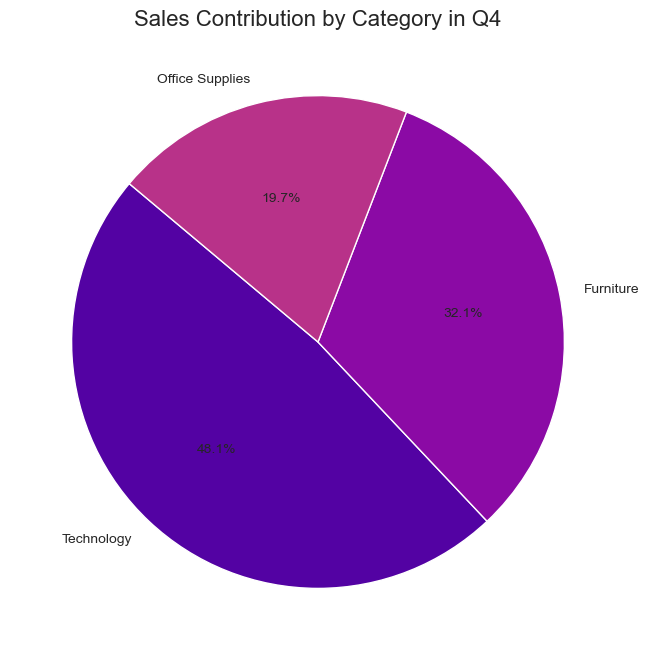

In [43]:
# Filter for Q4 data (months 10, 11, 12)
q4_df = df[df['Order Date'].dt.quarter == 4]

# Group by category and sum the sales for Q4
q4_sales_by_category = q4_df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

print("--- Q4 Sales by Product Category ---")
print(q4_sales_by_category)

# --- Visualization: Q4 Sales Contribution by Category ---
plt.figure(figsize=(8, 8))
plt.pie(q4_sales_by_category, labels=q4_sales_by_category.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('plasma'))
plt.title('Sales Contribution by Category in Q4', fontsize=16)
plt.ylabel('') # Hide the y-label for pie charts
plt.show()

### 6. Summary of Findings and Recommendations

### Key Insights from the Analysis

**Overall Sales and Profitability:**  
The company achieved approximately **1.71 million** in total sales, generating a total profit of **$289,000** in this dataset.

**Profitability vs. Sales Disparity:**  
While the **Technology** category leads in both sales and absolute profit, the **Office Supplies** category shows a much higher profit margin (**17.5%**), making it a standout area for efficient and scalable profit growth.

**The "Discount Trap":**  
There is a strong negative correlation (**-0.51**) between discount rates and profit. The deep-dive analysis reveals a clear "tipping point," with discounts over **20%** consistently resulting in a net loss.

**Regional Performance Imbalance:**  
**Western Europe** tops the list in total sales, but **Eastern Asia** generates the highest overall profit. This highlights regional differences in margin control and discount strategy.

**Clear Seasonal Sales Trend:**  
A time-series analysis shows a sharp increase in sales during **Q4 (October–December)**, driven primarily by the **Technology** category and the **Consumer** segment.


### Executive Summary & Recommendations

#### Objective  
This analysis of the **Global Superstore** dataset was conducted to identify the key drivers of profitability and provide actionable, data-backed strategies to improve overall business performance.

#### Key Findings  
The analysis revealed a critical profitability imbalance. While the **Technology** category drives the highest sales, the **Office Supplies** category is the most efficient profit engine with a **17.5% profit margin**.

However, profitability is being severely eroded by an ineffective discount strategy, evidenced by a strong negative correlation (**-0.51**) between discounts and profit. Our data shows a clear tipping point, with **discounts over 20%** consistently resulting in a net loss.

#### Actionable Recommendations

**1. Revise Discount Strategy & Cap at 20%**  
Implement a new company-wide policy where discounts above **20%** require managerial approval. This single action directly addresses the primary source of profit loss identified in the analysis.

**2. Prioritize High-Margin Categories**  
Reallocate marketing and inventory resources to promote high-margin **Office Supplies** sub-categories like **"Fasteners"** and **"Paper"**, which boast margins of over **40%**, to maximize overall company profit.

**3. Leverage Best Practices from High-Performing Regions**  
Adopt the low-discount, high-profitability model of the **Eastern Asia** region as a best practice. Pilot this revised strategy in **Western Europe**, a high-sales but lower-margin region, to improve its profitability.

**4. Plan Strategically for Q4 Seasonality**  
Prepare for the **Q4** sales spike by increasing inventory of high-demand **Technology** products and high-margin **Office Supplies** in **Q3**. Launch targeted marketing campaigns to the **Consumer** segment, which drives the majority of Q4 sales.t.venue opportunity.